##Большая просьба сдавать работы на проверку, в которых сразу выполнены четыре обязательных задания. 

##Задание 1. Библиотека VK API

Напишите код, который получает список названия школ города Кемерово с помощью библиотеки vk_api и записывает результаты в файл JSON.

Решение без апи_вк

In [ ]:
import requests, json,re
from collections import defaultdict

ACCESS_TOKEN = '' 
METHOD_NAME = 'database.getSchools'
URL = f'https://api.vk.com/method/{METHOD_NAME}'
pattern = r'[/.а-яА-ЯёЁ№()0-9\- ]+'

params = {
    "access_token": ACCESS_TOKEN,
    "city_id": 64,
    "sort": 6,
    "v": 5.131
}
final_res = defaultdict(list)
res = requests.get(URL, params=params).text
res1 = re.findall(pattern, res)                    # отбор регуляркой
res1 = [i for i in res1 if  any(map(lambda x: x in [(lambda c: chr(c))(i) for i in range(1072, 1104)], i))]
res = res.split(':')       # отбор не регуляркой 
res = [i.replace('},{"id"','').replace('}]}}','') for i in res if  any(map(lambda x: x in [(lambda c: chr(c))(i) for i in range(1072, 1104)],i )) ]
for j in res1:
    final_res[j[:j.find('№')]].append(j[j.rfind('№'):])
print(*final_res.items(), sep='\n')
with open('kemerovo_schools.json', 'w', encoding='utf8') as file:
    json.dump(final_res, file, ensure_ascii=False, indent=2)
#таким образом уменьшаем коллизию бд сразу при создании файла в разы
# при необходимости можно полирнуть отбор, чтоб корректно отображал именные
# учебные заведения(в отдельные словари) и без номеров


('Школа ', ['№ 1', '№ 2', '№ 3', '№ 4', '№ 5', '№ 7', '№ 8', '№ 10', '№ 11', '№ 12 им. В. Д. Волошиной', '№ 14', '№ 15', '№ 16 им. Р. Г. Цецульникова', '№ 17', '№ 18 им. Н. И. Жадовца', '№ 19', '№ 20', '№ 21', '№ 23', '№ 24', '№ 25', '№ 26', '№ 28', '№ 31 им. В. Д. Мартемьянова', '№ 32 им. А. А. Капитонова', '№ 33 им. А. В. Бобкова', '№ 34 им. С. А. Амелина', '№ 35 им. Л. И. Соловьева', '№ 36', '№ 37 им. Г. Г. Новикова', '№ 38', '№ 39', '№ 40 им. Катасонова С.А.', '№ 41', '№ 42', '№ 43', '№ 44 им. М. Я. Вознесенского', '№ 45', '№ 46', '№ 47', '№ 48 им. М. Ю. Коломина', '№ 49', '№ 50 им. Бабенко А. А.', '№ 51', '№ 52', '№ 54', '№ 55', '№ 56', '№ 58', '№ 59', '№ 60', '№ 61', '№ 62', '№ 65', '№ 66'])
('Гимназия ', ['№ 1', '№ 17', '№ 21', '№ 23', '№ 25', '№ 41', '№ 42'])
('Детская музыкальная школа ', ['№ 1', '№ 2', '№ 4', '№ 43'])
('Спортивная школа олимпийского резерва ', ['№ 1'])
('Детская художественная школа ', ['№ 1', '№ 19'])
('Профессиональный лицей ', ['№ 1'])
('Профессионально-те

In [ ]:
!pip install vk_api

In [ ]:
import vk_api, json,re
from collections import defaultdict

ACCESS_TOKEN = '' 
pattern = r'[/.а-яА-ЯёЁ№()0-9\- ]+'
try:
  vk_session = vk_api.VkApi(token=ACCESS_TOKEN)
  vk = vk_session.get_api()
  city = vk.database.getCities(country_id=1, q='Кемерово', count=1)
  city_id = city['items'][0]['id'] if city['count'] > 0 else None
  res_dict = vk.database.getSchools(country_id=1, city_id=city_id)
  res = str(res_dict)

  final_res = defaultdict(list)
#   res1 = re.findall(pattern, res)                    # отбор регуляркой
#   res1 = [i for i in res1 if  any(map(lambda x: x in [(lambda c: chr(c))(i) for i in range(1072, 1104)], i))]

#   res = res.split(':')       # отбор не регуляркой 
#   res = [i.replace('},{"id"','').replace('}]}}','') for i in res if  
#         any(map(lambda x: x in [(lambda c: chr(c))(i) for i in range(1072, 1104)],i )) ]

#   for j in res1:
#       final_res[j[:j.find('№')]].append(j[j.rfind('№'):])
#   print(*final_res.items(), sep='\n')
# except Exception as ex:
#   print(f'ERROR: {ex}')

# with open('kemerovo_schools.json', 'w', encoding='utf8') as file:
#     json.dump(final_res, file, ensure_ascii=False, indent=1)
  for j in [i['title'].split() for i in res_dict['items']]:
    if len(j) == 3:
      final_res[j[0]].append(f'{j[1]} {j[2]}')
    if len(j) == 4:
      final_res[f'{j[0]} {j[1]}'].append(f'{j[2]} {j[3]}')
    if len(j) == 5:
      final_res[f'{j[0]} {j[1]} {j[2]}'].append(f'{j[3]} {j[4]}')
    if len(j) == 6:
      final_res[f'{j[0]} {j[1]} {j[2]} {j[3]}'].append(f'{j[4]} {j[5]}')
    if len(j) >6:
      final_res[' '.join([k for k in j if k=='.' or k.isalpha()])].append(' '.join([k for k in j if k != '.' or not k.isalpha()]))
except Exception as ex:
  print(f'ERROR: {ex}')
with open('kemerovo_schools_vk.json', 'w', encoding='utf8') as file:
     json.dump(final_res, file, ensure_ascii=False, indent=1)

### Возможный алгоритм решения задачи:

1.   Получаем токен доступа к API Вконтакте
2.   Инициализируем сессию библиотеки VK_API с помощью токена доступа
3. Получаем доступ с помощью VK_API к API «ВКонтакте» методом get_api
4. Следуя методу из документации для получения городов и используя библиотеку VK_API, составляем запрос на получение информации о городе «Кемерово» и получаем его id из ответа на запрос
5. Следуя методу из документации для получения школ и используя библиотеку VK_API, составляем запрос на получение информации о школах города «Кемерово» (по найденному id) и получаем список названия школ
10. Конкретный формат не указан, поэтому создаем JSON с удобными ключами.<br>Например: result: {schools: [...]}
11. Записываем созданный  словарик  в файл с форматом JSON 





##Задание 2. Запись данных в CSV формат

С помощью методов API «ВКонтакте» получите 1000 подписчиков группы «Лентач», отсортирванных по дате регистрации.

Вам необходимо собрать следующие данные в CSV файл: пол, название город, семейное положение (ФИО партнера не указывать).

Решение без апи_вк

In [ ]:
import requests, csv

ACCESS_TOKEN = ''
METHOD_NAME = 'groups.getMembers'
URL = f'https://api.vk.com/method/{METHOD_NAME}'


params = {
    "access_token": ACCESS_TOKEN,
    'group_id' : 29534144,
    'fields' : 'sex, city, relation',
    'sort': 'id_asc',
    "v": 5.131
}
relations = {
  1 : "не женат/не замужем",
  2 : "есть друг/есть подруга",
  3 : "помолвлен/помолвлена",
  4 : "женат/замужем",
  5 : "всё сложно",
  6 : "в активном поиске",
  7 : "влюблён/влюблена",
  8 : "в гражданском браке",
  0 : "не указано"
}
seex = {0: 'не указан', 1: 'Ж', 2: 'М'}
res = requests.get(URL, params=params).json()
res = res['response']["items"]
res_list = []
for r in res:
    if 'city' in r:
        city = r['city']['title']
    else: city = 'Город-Герой'
    # sex = r.get('sex', 0)
    # relation = r.get('relation', 0)
    res_list.append({'city' : city,'sex' : seex[r.get('sex', 0)], 'ralation' : relations[r.get('relation', 0)]})


with open('lentach.csv', 'w', encoding='utf8', newline='') as file:
        writer = csv.DictWriter(file,fieldnames=res_list[0])
        writer.writeheader()
        for row in res_list:
            writer.writerow(row)
# import pandas as pd
# f = pd.read_csv("lentach.csv")
# keep_col = ['relation','sex','city']
# new_f = f[keep_col]
# new_f.to_csv("lentach_pd.csv", index=False)



In [ ]:
!pip install vk_api

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.6/48.6 KB 2.0 MB/s eta 0:00:00


In [ ]:
import vk_api, csv

ACCESS_TOKEN = ''

try:
  vk_session = vk_api.VkApi(token=ACCESS_TOKEN)
  vk = vk_session.get_api()
  group = vk.groups.search(q='Лентач', count=1)
  group_id = group['items'][0]['id'] if group['count'] > 0 else None
    
  res = vk.groups.getMembers(group_id=group_id, 
                             sort='id_asc', count=1000, 
                             fields='sex, city, relation')["items"]
  

  relations = {
    1 : "не женат/не замужем",
    2 : "есть друг/есть подруга",
    3 : "помолвлен/помолвлена",
    4 : "женат/замужем",
    5 : "всё сложно",
    6 : "в активном поиске",
    7 : "влюблён/влюблена",
    8 : "в гражданском браке",
    0 : "не указано"
  }
  seex = {0: 'не указан', 1: 'Ж', 2: 'М'}
  res_list = []
  for r in res:
      if 'city' in r:
          city = r['city']['title']
      else: city = 'Город-Герой'
      # sex = r.get('sex', 0)
      # relation = r.get('relation', 0)
      res_list.append({'city' : city,'sex' : seex[r.get('sex', 0)], 'ralation' : relations[r.get('relation', 0)]})
except Exception as ex:
  print(f'ERROR: {ex}') 

with open('lentach.csv', 'w', encoding='utf8', newline='') as file:
        writer = csv.DictWriter(file,fieldnames=res_list[0])
        writer.writeheader()
        for row in res_list:
            writer.writerow(row)

### Возможный алгоритм решения задачи:

1. Получаем токен доступа к API Вконтакте
2. Инициализируем сессию библиотеки VK_API с помощью токена доступа
3. Получаем доступ с помощью VK_API к API вконтакте методом get_api
4. Следуя методу из документации для получения сообществ и используя библиотеку VK_API, составляем запрос на получение информации о сообществе «Лентач» и получаем его id из ответа на запрос
5. Следуя методу (getMembers) из документации для получения участников сообщества и используя библиотеку VK_API, составляем запрос на получение информации о участниках сообщества «Лентач» (по найденному id) и получаем пол, город и СП каждого из участников
6. С помощью CSV библиотеки записываем полученные данные в файл с форматом csv





##Задание 3. Скрещиваем Selenium и BeautifulSoup

Соберите информацию с сайта nbcomputers.ru (https://www.nbcomputers.ru/catalog/noutbuki/) о ноутбуках данного интернет-магазина.
<br>
Данные, которые необходимы:
* Название ноутбука
* Цена ноутбука
* Код товара

Результат необходимо записать в CSV файл.
<br>
*(совет: обязательно делайте различные временные промежутки между прокликами)*

Запустить в colab не получилось, использую вин7 а он не поддерживает веб-драйвер необходимой версии. В pycharme собирает csv как надо, при необходимости приложу файл\проект.

In [ ]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup
import csv


service = Service(executable_path='/usr/lib/chromium-browser/chromedriver')
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument("--headless")
chrome_options.add_argument("--no-sandbox")
driver = webdriver.Chrome(service=service, options=chrome_options)

URL = f'https://www.nbcomputers.ru/catalog/noutbuki/?page=1'

res_name_price_id = []

driver.implicitly_wait(5)

# определяем функцию для парсинга в бс4
def parse(URL_page):
    driver.get(URL)
    html = driver.page_source

    soup = BeautifulSoup(html, 'lxml')
    all_cards = soup.select('article')
    for card in all_cards:
        name = (card.select_one('.iVdSZe').text).split('&')[0]
        price = ''.join(list((i for i in (card.select_one('.sc-96470d6e-2').text) if i.isdigit())))
        id = card.select_one('.cfXmWO').text.split()[1].strip()
        res_name_price_id.append({'name': name, 'price': price, 'id': id})


try:
    parse(URL)
except Exception as ex:
    print(f'Error: {ex}')
parent_element = driver.find_element(By.XPATH, '//*[@id="catalog-listing"]/div[2]/ul/li[8]/a')

"""Тут начинается самое смешное: по теническим причинам, для меня была отрезана возможность запарсить страницу
используя кнопку "показать еще", и для того, чтобы использовать селениум хоть как то, я заставил 
нажимать его каждую последующую страницу, нашел 2 способа - XPath и сабстрока,  по сабстроке
он открывал новую вкладку в браузере при переходе, а у меня по какой то причине не переключаются
при помощи window_handles-switch_to.window, поэтому принял решение искать кнопки по XPath. 
Для этого разработал алгоритм который присутсвует ниже: end находит номер последней страницы,
словарь открывает первые 5 страниц и последнюю (на сайте при подгрузки, кнопки смещаются),
и условие которое прописывает пусть на все остальные страницы"""
end = int(driver.execute_script('return arguments[0].firstChild.textContent;', parent_element).strip())

"""А потом я нашел кнопку "следущая страница..:=)"""
dict_XPath = {2: 3, 3: 4, 4: 5, 5: 6}
dict_XPath[end] = 8
try:
    for i in range(2, end+1):
        if 5 < i < end:
            j = 7
        else:
            j = dict_XPath[i]
        driver.implicitly_wait(5)
        actions = ActionChains(driver)
        wait = WebDriverWait(driver, timeout=15)

        actions.move_to_element(driver.find_element(By.XPATH, f'//*[@id="catalog-listing"]/div[2]/ul/li[{j}]/a'))
        actions.perform()
        actions.scroll_to_element(driver.find_element(By.XPATH, f'//*[@id="catalog-listing"]/div[2]/ul/li[{j}]/a'))
        actions.perform()
        # link_page = driver.find_element(By.CSS_SELECTOR, f'ul > li.ant-pagination-item.ant-pagination-item-{i} > a').get_attribute('href') #  пытался очень долго, стабильную ссылку получить не выходит
        wait.until(EC.element_to_be_clickable((By.XPATH, f'//*[@id="catalog-listing"]/div[2]/ul/li[{j}]/a'))).click()

        URL = f'{URL[:URL.index("=")+1]}{i}'
        parse(URL)
except Exception as ex:
    print(f'Error: {ex}')
print(len(res_name_price_id))

driver.quit()

with open('bs4_selen.css', 'w', encoding='utf8', newline='') as file:
    writer = csv.DictWriter(file, fieldnames=res_name_price_id[0])
    writer.writeheader()
    for row in res_name_price_id:
        writer.writerow(row)
    

<ipython-input-10-ed878e9950d5>:15: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(executable_path='/usr/lib/chromium-browser/chromedriver', options=chrome_options)


SessionNotCreatedException: ignored

### Возможный алгоритм решения задачи в Colab (простой):

Возможный алгоритм решения задачи в коллабе (простой):
1. Установливаем параметры для headless браузера
2. Инициализацируем сессию браузера
3. Переходим по данной ссылке
4. Устанавливаем неявное ожидание
5. Инициализируем явное ожидание для нажатия на кнопку "Больше"
6. С помощью бесконечного цикла жмем на кнопку методом click, пока она кликабельна  (ну и не забываем про селектор)
4. Оборачиваем все в trt except.Когда вылетит с ошибкой того, что кнопка не кликабельна => прогрузили все карточки

5. С помощью BS находим блок карточек
6. Поочереднно собираем необходимые данные с карточки
7. Записываем все в файл с форматом csv, используя CSV библиотеку



##Задание 4. Фреймворк Scrapy

Соберите информацию о заквасках с сайта pro-syr.ru (https://pro-syr.ru/zakvaski-dlya-syra/mezofilnye/)

Необходимо собрать следующие данные:
* Название продукта
* Цена
* Есть ли продукт в наличии

Результат должен быть записан в CSV файл

In [ ]:
! pip install scrapy


In [ ]:
!scrapy startproject last_sir



In [ ]:
%cd /content/sir/sirsir/last_sir

/content/sir/sirsir/last_sir


In [ ]:
import scrapy


class SirSpider(scrapy.Spider):
    name = "last_sir"
    start_urls = ["https://pro-syr.ru/zakvaski-dlya-syra/mezofilnye/"]

    def parse(self, response):
        links = response.css("div.row.grid-july div.nameproduct a::attr(href)")
        for link in links:
            yield response.follow(link, self.parse_product)

        link = response.css("div.col-sm-12 ul.pagination a::attr(href)")[-1].get()
        yield response.follow(link, self.parse)

    def parse_product(self, response):
        yield {
            "name": response.css("div.col-md-9 h1::text").get(),
            "price": response.css("li.price span::text").get(),
            "in_stock": response.css("div.product-description b::text").get()
        }

In [ ]:
%cd /content/sir/sirsir/last_sir

!scrapy crawl last_sir -o vsysnii_sir.csv

/content/sir/sirsir/last_sir
2023-03-29 16:51:32 [scrapy.utils.log] INFO: Scrapy 2.8.0 started (bot: last_sir)
2023-03-29 16:51:32 [scrapy.utils.log] INFO: Versions: lxml 4.9.2.0, libxml2 2.9.14, cssselect 1.2.0, parsel 1.7.0, w3lib 2.1.1, Twisted 22.10.0, Python 3.9.16 (main, Dec  7 2022, 01:11:51) - [GCC 9.4.0], pyOpenSSL 23.1.1 (OpenSSL 3.0.8 7 Feb 2023), cryptography 39.0.2, Platform Linux-5.10.147+-x86_64-with-glibc2.31
2023-03-29 16:51:32 [scrapy.crawler] INFO: Overridden settings:
{'BOT_NAME': 'last_sir',
 'FEED_EXPORT_ENCODING': 'utf-8',
 'NEWSPIDER_MODULE': 'last_sir.spiders',
 'REQUEST_FINGERPRINTER_IMPLEMENTATION': '2.7',
 'ROBOTSTXT_OBEY': True,
 'SPIDER_MODULES': ['last_sir.spiders'],
 'TWISTED_REACTOR': 'twisted.internet.asyncioreactor.AsyncioSelectorReactor'}
2023-03-29 16:51:32 [asyncio] DEBUG: Using selector: EpollSelector
2023-03-29 16:51:32 [scrapy.utils.log] DEBUG: Using reactor: twisted.internet.asyncioreactor.AsyncioSelectorReactor
2023-03-29 16:51:32 [scrapy.util

### Возможный алгоритм решения задачи:

1. Инициализируем проект SCRAPY
2. В папке spiders создаем своего паука
3. Создаем класс с пауком и наследуемся от scrapy.Spider
4. Называем паука так же, как и класс
5. Указываем стартовую ссылку
6. Создаем функцию парсинга карточки, где описываем получение данных из карточки в словарь (название, цена и запас). Возвращаем обратно словарь через yield.
7. Создаем функцию parse — основую логику перехода по ссылкам
8. Получаем ссылки на каждую карточек текущей страницы
9. Циклом проходимся по каждой и собираем данные через ранне коллбек функцию
10. Дальше в функции parse расписываем переход на следующую страницу. Для этого находим в пагинации ссылку на следующую страницу  и переходим на нее до тех пор, пока она не закончится.
11. В командной строке переходим в папку с проектом scrapy (%cd <название проекта>/) 
12. В командной строке пишем команду !scrapy runspider <название паука или путь до него из папки с проектом> -o <Название файла с форматом csv, куда будет записан результат парсинга>


Не забывайте пользоваться scrapy shell!

# **Дополнительно (по желанию)**

##Задание. Собираем данные с помощью Requests

С помощью методов API ВКонтакте получите список высших учебных заведений и названия их факультетов в городе Томск.
Результат должен быть записан в файл JSON в следующем формате:

In [ ]:
"result": {
  "cities": [
    {   
        "id": <ID города>,
        "name": <Название города>,
        "universites": [
            {
              "id": <ID ВУЗа>, 
              "name": <Название ВУЗа>
              "faculties": [<Название факультета>, …]
            },
            ...
        ]
    },
    ...
}

### Возможный алгоритм решения задачи:

1.   Получаем токен доступа к API Вконтакте
2.   Настраиваем подключение к API Вконтакте  и устанавливаем базовые параметры (токен и версия) GET запроса

---

3. Следуя методу из документации для получения городов и используя библиотеку requests, составляем запрос на получение информации о городе «Томск» и получаем его id и название из ответа на запрос

---
4. Следуя методу из документации для получения университетов и используя библиотеку requests, составляем запрос на получение информации о университетах города «Томск» (по найденному id) и получаем список университетов
5. Из полученного списка университетов получаем id и название каждого
6. Список id и названия университетов записываем в словарь с информацией о найденном городе под ключем 'universites'
---

7. Находим метод получения факультетов университета в документации API Вконтакте
8. Через цикл по каждому id университета, составляем запрос на получение информации о факультете университета (по найденному id) и получаем список названий факультетов
9. В этом же цикле записываем под ключем 'faculties' полученный список
---
10. Создаем финальный словарь с ключем 'result', значение которого будет еще один словарь 'cities' со значением созданного нами словаря с информацией о городе-университетах-факультетах
11. Записываем наш словарь в  файл с форматом JSON





Пример решения задачи-аналога: https://colab.research.google.com/drive/1kvqcs1R8oRueCa_EajNXdV4w1qr6DCgA?usp=sharing

##Задание. Библиотека BeautifulSoup

Написать код, который соберет список знаменательных дат в формате «чисто месяц год» с первой страницы сайта GCTC.ru (https://www.gctc.ru/main.php?id=98.1)

### Возможный алгоритм решения задачи:

1. Устанавливаем bs4
2. Здесь lxml неправильно декодирует html в дерево супа (это можно узнать путем проб и ошибок)
3. Устанавливаем любой другой парсер и проверяем, что он нормально декодирует (html5lib подходит)

4. С помощью requests инициализируем сессию, используя указанную ссылку, и устанавливем заголовки
5. Получаем из проинициализированной сессии text и варим суп
6. Получаем главный блок с помощью селектора из которого нужно достать данные
7. Получаем все теги h2, которые содержат год 
8. Создаем результативный массив и в цикле по каждому тегу h2 будем записывать в него полученный результат
9. В цикле обрезаем .г у года, Получаем ОДИН h1, который был до div.news h2 с помощью метода find_previous (это и есть день и месяц события)
10. Получаем дату+месяц, где первые два символа это день, а остальные символы это название месяца
11. Записываем все в результативный массив


Не забываем все обернуть в try except и проверять с помощью raise_for_status

##Задание. Библиотека Selenium

Написать код, который выполнит ввод слова «Lenovo» в поисковую строку сайта  nbcomputers.ru (https://www.nbcomputers.ru/) и начнет поиск
<br>
<br>
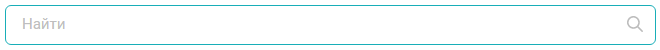

*(подсказка: изучите внимательно документацию и методы wait.until, click или send_keys)*

In [ ]:
%%shell
# Ubuntu no longer distributes chromium-browser outside of snap
#
# Proposed solution: https://askubuntu.com/questions/1204571/how-to-install-chromium-without-snap

# Add debian buster
cat > /etc/apt/sources.list.d/debian.list <<'EOF'
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-buster.gpg] http://deb.debian.org/debian buster main
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-buster-updates.gpg] http://deb.debian.org/debian buster-updates main
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-security-buster.gpg] http://deb.debian.org/debian-security buster/updates main
EOF

# Add keys
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys DCC9EFBF77E11517
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys 648ACFD622F3D138
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys 112695A0E562B32A

apt-key export 77E11517 | gpg --dearmour -o /usr/share/keyrings/debian-buster.gpg
apt-key export 22F3D138 | gpg --dearmour -o /usr/share/keyrings/debian-buster-updates.gpg
apt-key export E562B32A | gpg --dearmour -o /usr/share/keyrings/debian-security-buster.gpg

# Prefer debian repo for chromium* packages only
# Note the double-blank lines between entries
cat > /etc/apt/preferences.d/chromium.pref << 'EOF'
Package: *
Pin: release a=eoan
Pin-Priority: 500


Package: *
Pin: origin "deb.debian.org"
Pin-Priority: 300


Package: chromium*
Pin: origin "deb.debian.org"
Pin-Priority: 700
EOF

# Install chromium and chromium-driver
apt-get update
apt-get install chromium chromium-driver

# Install selenium
pip install selenium

Executing: /tmp/apt-key-gpghome.Je0hczM9J4/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys DCC9EFBF77E11517
gpg: key DCC9EFBF77E11517: public key "Debian Stable Release Key (10/buster) <debian-release@lists.debian.org>" imported
gpg: Total number processed: 1
gpg:               imported: 1
Executing: /tmp/apt-key-gpghome.MB07iGRF8a/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys 648ACFD622F3D138
gpg: key DC30D7C23CBBABEE: public key "Debian Archive Automatic Signing Key (10/buster) <ftpmaster@debian.org>" imported
gpg: Total number processed: 1
gpg:               imported: 1
Executing: /tmp/apt-key-gpghome.JO6h2oQHJk/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys 112695A0E562B32A
gpg: key 4DFAB270CAA96DFA: public key "Debian Security Archive Automatic Signing Key (10/buster) <ftpmaster@debian.org>" imported
gpg: Total number processed: 1
gpg:               imported: 1
Get:1 http://deb.debian.org/debian buster InRelease [122 kB]
Get:2 http://security.ubuntu.com/ubuntu

In [ ]:
# Install chromium and chromium-driver
!apt-get update
!apt-get install chromium chromium-driver


Hit:1 http://security.ubuntu.com/ubuntu focal-security InRelease
Hit:2 http://deb.debian.org/debian buster InRelease
Hit:3 http://deb.debian.org/debian buster-updates InRelease
Hit:4 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease
Hit:5 http://deb.debian.org/debian-security buster/updates InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Hit:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Hit:8 http://archive.ubuntu.com/ubuntu focal InRelease
Hit:9 http://archive.ubuntu.com/ubuntu focal-updates InRelease
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Hit:11 http://archive.ubuntu.com/ubuntu focal-backports InRelease
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease
Hit:14 http://ppa.launchpad.net/ubuntugis/ppa/ubuntu focal InRelease
Reading package lists... Done
Reading package

In [ ]:

# Install selenium
!pip install selenium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.support.wait import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC


chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument("window-size=1920,1080")
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome('/usr/bin/chromedriver',options=chrome_options)





try:
    driver.get("https://www.nbcomputers.ru/")
    driver.implicitly_wait(10)
    bt_search = driver.find_element(By.CSS_SELECTOR, 'input.ant-input')
    ActionChains(driver).move_to_element(bt_search).click(bt_search).send_keys('Lenovo\n').perform() 
    # bt_search.send_keys('Lenovo\n')
except Exception as ex:
    print(f'Error: {ex}')

html = driver.page_source
driver.quit()

<ipython-input-7-de8825436f62>:13: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('/usr/bin/chromedriver',options=chrome_options)


### Возможный алгоритм решения задачи:

Возможный алгоритм решения задачи в коллабе (простой):
1. Установливаем параметры для headless браузера
2. Инициализацируем сессию браузера
3. Переходим по данной ссылке
4. Находим элемент по селектору
5. С помощью метода send_keys и \n в конце строки (\n имитирует нажатие кнопки Enter) выполняем поиск

Более сложный  и верный с использованием ожиданий
